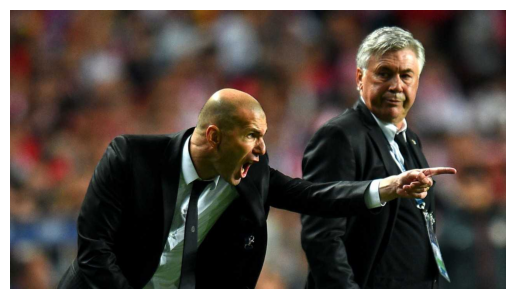

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


0: 384x640 2 persons, 379.0ms
Speed: 21.2ms preprocess, 379.0ms inference, 43.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
Detected person with 0.82 confidence at [749.491455078125, 42.51470947265625, 1148.36962890625, 711.427734375]
Detected person with 0.60 confidence at [99.3115234375, 200.89508056640625, 1110.9500732421875, 713.401123046875]


In [24]:
# Install ultralytics (only once per environment)
!pip install ultralytics

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import requests
import numpy as np

# Load YOLOv8 model (nano version: fast & lightweight)
model = YOLO("yolov8n.pt")

# Download test image
image_url = "https://ultralytics.com/images/zidane.jpg"
arr = np.asarray(bytearray(requests.get(image_url).content), dtype=np.uint8)
img_cv = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Convert BGR → RGB for matplotlib
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# Run YOLOv8 inference
results = model.predict(img_rgb, save=True, show=True)

# If you want bounding box coordinates & labels:
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])  # class id
        conf = float(box.conf[0])  # confidence
        xyxy = box.xyxy[0].tolist()  # [x1, y1, x2, y2]
        print(f"Detected {model.names[cls]} with {conf:.2f} confidence at {xyxy}")